## Stock prices prediction
The other objective of this project is to predict the future 25 day closing prices of tech companies. I would be predicting the relationship using a linear regression model and evaluate the performance of the model in predicting closing prices.

The first step is to import required packages

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Then, I import the `tech-stock-data.csv` data generated from Tiingo daily reader in the stock-analysis.ipynb jupyter notebook.

In [88]:
df = pd.read_csv("tech-stock-data.csv")

I preview the dataframe to check if there are any null values.

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2268 entries, 0 to 2267
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       2268 non-null   object 
 1   date         2268 non-null   object 
 2   close        2268 non-null   float64
 3   high         2268 non-null   float64
 4   low          2268 non-null   float64
 5   open         2268 non-null   float64
 6   volume       2268 non-null   int64  
 7   adjClose     2268 non-null   float64
 8   adjHigh      2268 non-null   float64
 9   adjLow       2268 non-null   float64
 10  adjOpen      2268 non-null   float64
 11  adjVolume    2268 non-null   int64  
 12  divCash      2268 non-null   float64
 13  splitFactor  2268 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 248.2+ KB


There are no null values, therefore we could proceed with the analysis.

## Part 1: Correlation between variables

Before running a linear regression model on the future 25 day closing prices, I explore which variables in the dataframe should be included in the model. This can be done by exploring the correlation between the variables and future 25 day closing prices.

For running correlations, I make a new dataframe `variables_cor_df` and drop variables that are irrelevant to my analysis (i.e., the `date` variable).

In [90]:
variables_cor_df = df.drop(columns = 'date')

I then calculate the future 25 day closing prices by shifting the closing prices by 25 days. The future closing prices is stored under the new `target` variable.

In [91]:
variables_cor_df['target'] = variables_cor_df['close'].shift(-25)

A new dataframe `variables_cor_matrix` is created for calculating the correlations all variables in the `variables_cor_df` dataframe.

In [92]:
variables_cor_matrix = variables_cor_df.corr().round(2)
variables_cor_matrix

/var/folders/_j/0x480n6d6r79_8qfp984ydxm0000gn/T/ipykernel_12935/1874325045.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  variables_cor_matrix = variables_cor_df.corr().round(2)


,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor,target
close,1.00,1.00,1.00,1.00,-0.59,-0.27,-0.27,-0.26,-0.27,-0.08,-0.05,-0.02,0.97
high,1.00,1.00,1.00,1.00,-0.59,-0.27,-0.27,-0.26,-0.27,-0.08,-0.05,-0.02,0.97
low,1.00,1.00,1.00,1.00,-0.59,-0.27,-0.27,-0.26,-0.26,-0.08,-0.05,-0.02,0.97
open,1.00,1.00,1.00,1.00,-0.59,-0.27,-0.27,-0.26,-0.26,-0.08,-0.05,-0.02,0.97
volume,-0.59,-0.59,-0.59,-0.59,1.00,-0.06,-0.06,-0.07,-0.06,0.54,0.03,0.10,-0.57
adjClose,-0.27,-0.27,-0.27,-0.27,-0.06,1.00,1.00,1.00,1.00,-0.42,-0.04,-0.01,-0.28
adjHigh,-0.27,-0.27,-0.27,-0.27,-0.06,1.00,1.00,1.00,1.00,-0.42,-0.04,-0.01,-0.28
adjLow,-0.26,-0.26,-0.26,-0.26,-0.07,1.00,1.00,1.00,1.00,-0.43,-0.04,-0.01,-0.28
adjOpen,-0.27,-0.27,-0.26,-0.26,-0.06,1.00,1.00,1.00,1.00,-0.42,-0.04,-0.01,-0.28
adjVolume,-0.08,-0.08,-0.08,-0.08,0.54,-0.42,-0.42,-0.43,-0.42,1.00,0.06,0.06,-0.07


To better visualise the relationship between variables, a heatmap is plotted.

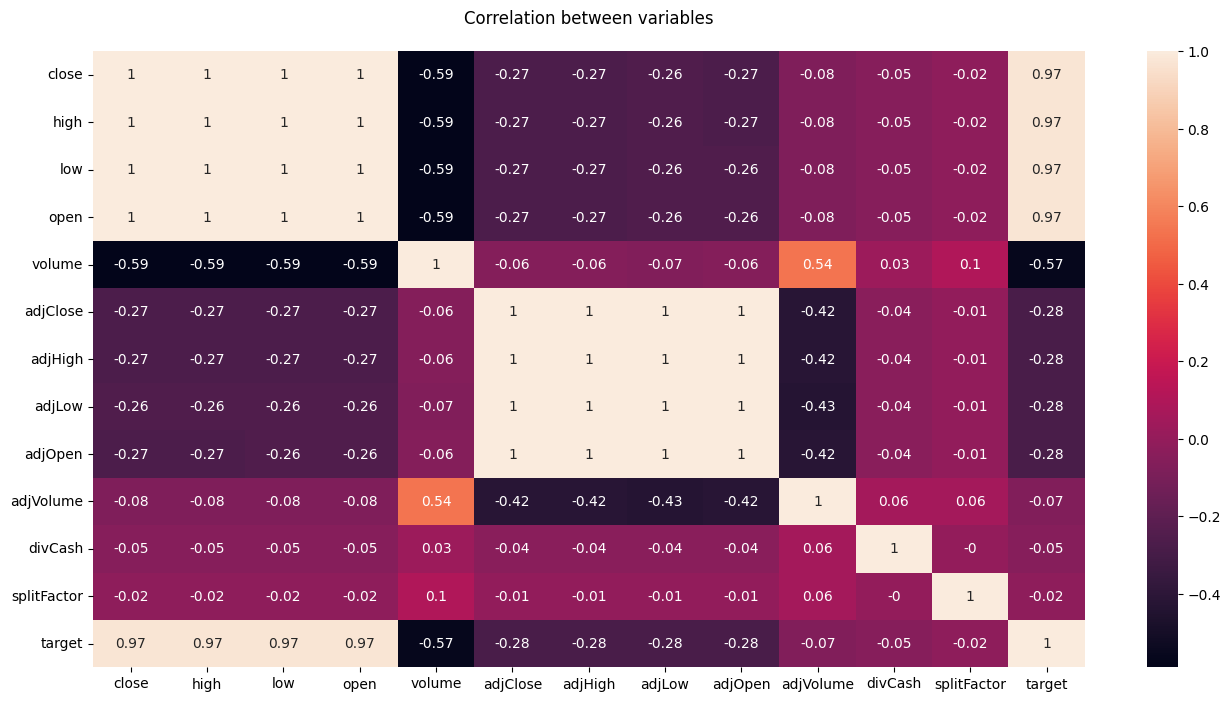

In [93]:
plt.figure(figsize = (16, 8))

sns.heatmap(data=variables_cor_matrix, annot=True)

plt.title('Correlation between variables', pad=20)
plt.show()

The `target` variable (i.e., future 25 day closing prices) correlates the most with current day closing prices (`close`), highest trading prices (`high`), lowest trading prices (`low`) and opening prices (`open`). Therefore, I would include these variables in the following linear regression models to predict closing prices 25 days into the future.

## Part 1: GOOG

To predict closing prices of GOOG, I first prepare a separate data frame for GOOG data by extracting the relevant columns (`close`,`high`, `low`, `open`). Following that, I added a new `target` column to include the closing prices of future 25 days. Lastly, I dropped the last 25 rows, as they have null values in the `target` column.

In [94]:
goog = df.loc[df['symbol'] == "GOOG"]

goog_df = goog[['close','high','low','open']]

goog_df['target'] = goog_df['close'].shift(-25)

goog_df.dropna(axis=0,inplace=True)

goog_df.reset_index(inplace=True)

/var/folders/_j/0x480n6d6r79_8qfp984ydxm0000gn/T/ipykernel_12935/1711705516.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goog_df['target'] = goog_df['close'].shift(-25)
/var/folders/_j/0x480n6d6r79_8qfp984ydxm0000gn/T/ipykernel_12935/1711705516.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goog_df.dropna(axis=0,inplace=True)


After preparing a data frame for GOOG data, I define the predictor variables (`close`,`high`, `low`, `open`) by naming them as `goog_x` and outcome variable (`target`) as `goog_y`. After that, I split the predictor variable and outcome dataframes, such that 80% of the data points go into the training dataframe and the remaining 20% go into the testing dataframe.

In [95]:
goog_x = goog_df.drop('target', axis=1).copy()
goog_y = goog_df['target'].copy()

# splitting the GOOG datframe into training and testing datframes
goog_x_train, goog_x_test, goog_y_train, goog_y_test  = train_test_split(goog_x, goog_y, test_size = 0.2)

I then inspect the number of rows and columns of the training and testing datframes.

In [96]:
# inspecting the number of rows and columns of the GOOG training and testing datframes
print("The shape of the training and testing datframes are as follows:\ngoog_x_train: {}\ngoog_x_test: {}\ngoog_y_train: {}\ngoog_y_test: {} \n".format(goog_x_train.shape, goog_x_test.shape, goog_y_train.shape, goog_y_test.shape))

print("There are {} rows and {} columns in the GOOG training datframe.\nThere are {} rows and {} columns in the GOOG testing datframe.".format(goog_y_train.shape[0], goog_x_train.shape[1], goog_y_test.shape[0], goog_x_test.shape[1]))

The shape of the training and testing datframes are as follows:
goog_x_train: (433, 5)
goog_x_test: (109, 5)
goog_y_train: (433,)
goog_y_test: (109,) 

There are 433 rows and 5 columns in the GOOG training datframe.
There are 109 rows and 5 columns in the GOOG testing datframe.


I builed a linear regression model to predict the future 25 day closing prices in the training dataframe accotding to the predictor variables in the training dataframe (daily closing, highest trading, lowest trading and opening prices).

In [97]:
goog_model = LinearRegression()
goog_model.fit(goog_x_train, goog_y_train)

LinearRegression()

After building the model, the outcome variables in the testing dataframe is fitted to the linear regression model to predict the the future 25 day closing prices. 

In [98]:
goog_model_prediction = goog_model.predict(goog_x_test)
print("The actual verses predicted values of GOOG future 25 day closing prices:")
pd.DataFrame({'Actual values':np.array(goog_y_test), 'Predicted values':np.array(goog_model_prediction)})

The actual verses predicted values of GOOG future 25 day closing prices:


,Actual values,Predicted values
0,1263.47,1227.111629
1,2884.41,2976.864669
2,2070.07,1912.889064
3,1403.26,1215.008104
4,2316.16,2327.160086
...,...,...
104,2044.36,2185.414674
105,1438.04,1470.659591
106,2875.48,2825.496420
107,1818.55,1769.457025


R squared is used to evaluate the model performance in accurately predicting the GOOG future 25 day closing prices in the testing dataframe based on the predictor variables in the testing dataframe.

In [99]:
goog_model_r2 = (abs(goog_model.score(goog_x_test,goog_y_test)*100)).round(2)
print('The r^2 of the GOOG linear regression model is: ', goog_model_r2, '%')

The r^2 of the GOOG linear regression model is:  96.08 %


I then visualise the predictions versus actual closing prices.

Text(0.5, 1.0, 'Predicting GOOG closing prices with linear regression')

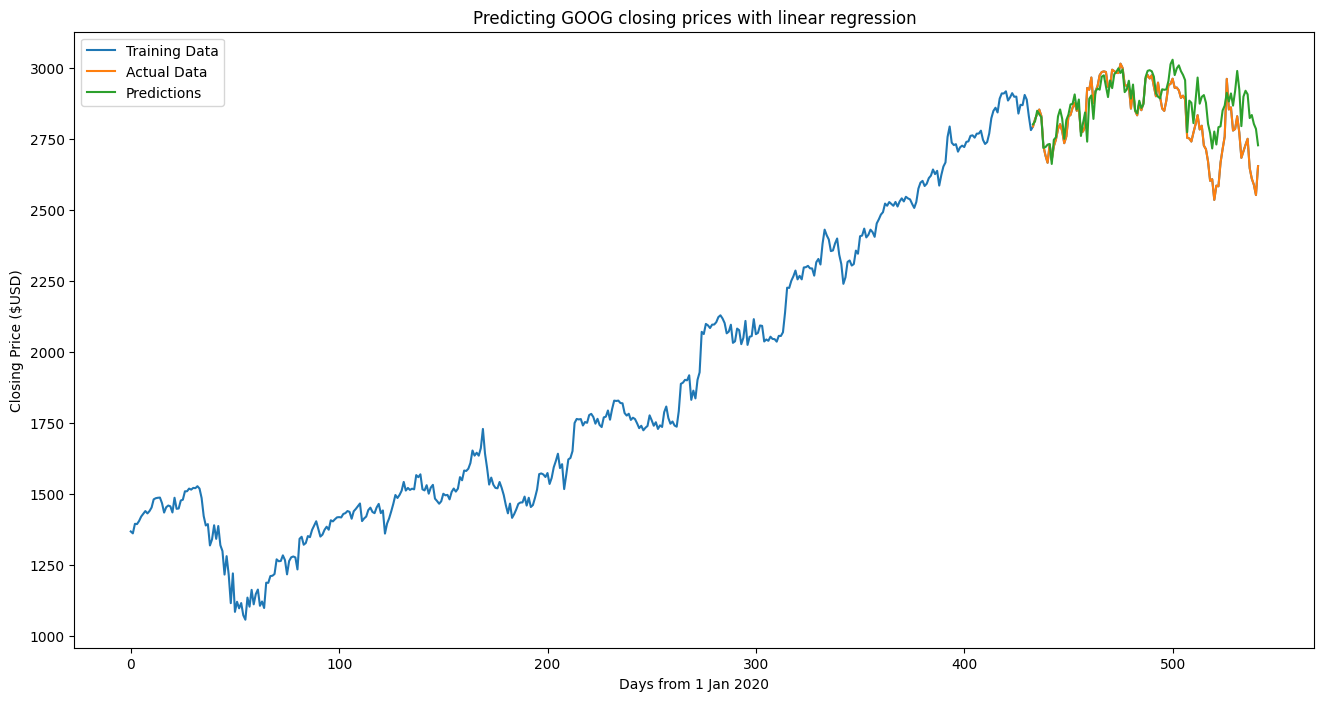

In [100]:
plt.figure(figsize=[16,8])

plt.plot(goog_df['close'])

goog_model_plot = goog_df[433:].copy()
goog_model_plot['predict'] = goog_model.predict(goog_model_plot.drop(columns = 'target'))
plt.plot(goog_model_plot[['close', 'predict']])

plt.legend(['Training Data', 'Actual Data', "Predictions"])
plt.xlabel('Days from 1 Jan 2020')
plt.ylabel('Closing Price ($USD)')
plt.title('Predicting GOOG closing prices with linear regression')

Linear regression was used to predict GOOG closing prices 25 days into the future according to its current closing, highest trading, lowest trading and opening prices. 

The predicters account for 94.92% of the variance in GOOG closing prices 25 days into the future.

## Part 2: AMZN

I then predict the AMZN closing prices 25 days into the future according to current day closing, highest trading, lowest trading and opening prices using linear regression. The procedures are the same as above:
1. Preparing a dataframe with the predictor variables (i.e., `close`,`high`,`low`,`open`) and outcome variable (i.e., closing prices 25 days into the future `target`)
2. Splitting the dataframe into training and testing dataframes
3. Building a linear regression model with the training dataframes
4. Based on the linear regression model, predicting the future closing prices according to predictor variables in the testing dataframe
5. Evaluating the linear regression model performance
6. Visualising the linear regresison model performance

In [101]:
# preparing the AMZN datframe
amzn = df.loc[df['symbol'] == "AMZN"]

amzn_df = amzn[['close','high','low','open']]

amzn_df['target'] = amzn_df['close'].shift(-25)

amzn_df.dropna(axis=0,inplace=True)

amzn_df.reset_index(inplace=True)

/var/folders/_j/0x480n6d6r79_8qfp984ydxm0000gn/T/ipykernel_12935/858551666.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amzn_df['target'] = amzn_df['close'].shift(-25)
/var/folders/_j/0x480n6d6r79_8qfp984ydxm0000gn/T/ipykernel_12935/858551666.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amzn_df.dropna(axis=0,inplace=True)


In [102]:
# defining the predictor (x) and outcome (y) variables
amzn_x = amzn_df.drop('target', axis=1).copy()
amzn_y = amzn_df['target'].copy()

# splitting the AMZN datframe into training and testing datframes
amzn_x_train, amzn_x_test, amzn_y_train, amzn_y_test  = train_test_split(amzn_x, amzn_y, test_size = 0.2)

# inspecting the number of rows and columns of the AMZN training and testing datframes
print("The shape of the training and testing datframes are as follows:\namzn_x_train: {}\namzn_x_test: {}\namzn_y_train: {}\namzn_y_test: {} \n".format(amzn_x_train.shape, amzn_x_test.shape, amzn_y_train.shape, amzn_y_test.shape))

print("There are {} rows and {} columns in the AMZN training datframe.\nThere are {} rows and {} columns in the AMZN testing datframe.".format(amzn_y_train.shape[0], amzn_x_train.shape[1], amzn_y_test.shape[0], amzn_x_test.shape[1]))

The shape of the training and testing datframes are as follows:
amzn_x_train: (433, 5)
amzn_x_test: (109, 5)
amzn_y_train: (433,)
amzn_y_test: (109,) 

There are 433 rows and 5 columns in the AMZN training datframe.
There are 109 rows and 5 columns in the AMZN testing datframe.


In [103]:
# building the AMZN linear regression model
amzn_model = LinearRegression()
amzn_model.fit(amzn_x_train, amzn_y_train)

# predicting future AMZN closing prices based on the model
amzn_model_prediction = amzn_model.predict(amzn_x_test)
print("The actual verses predicted values of AMZN future 25 day closing prices:")
pd.DataFrame({'Actual values':np.array(amzn_y_test), 'Predicted values':np.array(amzn_model_prediction)})

The actual verses predicted values of AMZN future 25 day closing prices:


,Actual values,Predicted values
0,3236.08,3133.967904
1,3312.75,3292.017655
2,2720.29,3056.990767
3,3318.11,3340.051236
4,3471.31,3130.117532
...,...,...
104,3572.57,3371.211737
105,1997.59,2264.849818
106,3284.72,3024.790115
107,3561.57,3326.194509


In [104]:
# evaluating the AMZN linear regression model performance
amzn_model_r2 = (abs(amzn_model.score(amzn_x_test,amzn_y_test)*100)).round(2)
print('The r^2 of the AMZN linear regression model is: ', amzn_model_r2, '%')

The r^2 of the AMZN linear regression model is:  74.98 %


Text(0.5, 1.0, 'Predicting AMZN closing prices with linear regression')

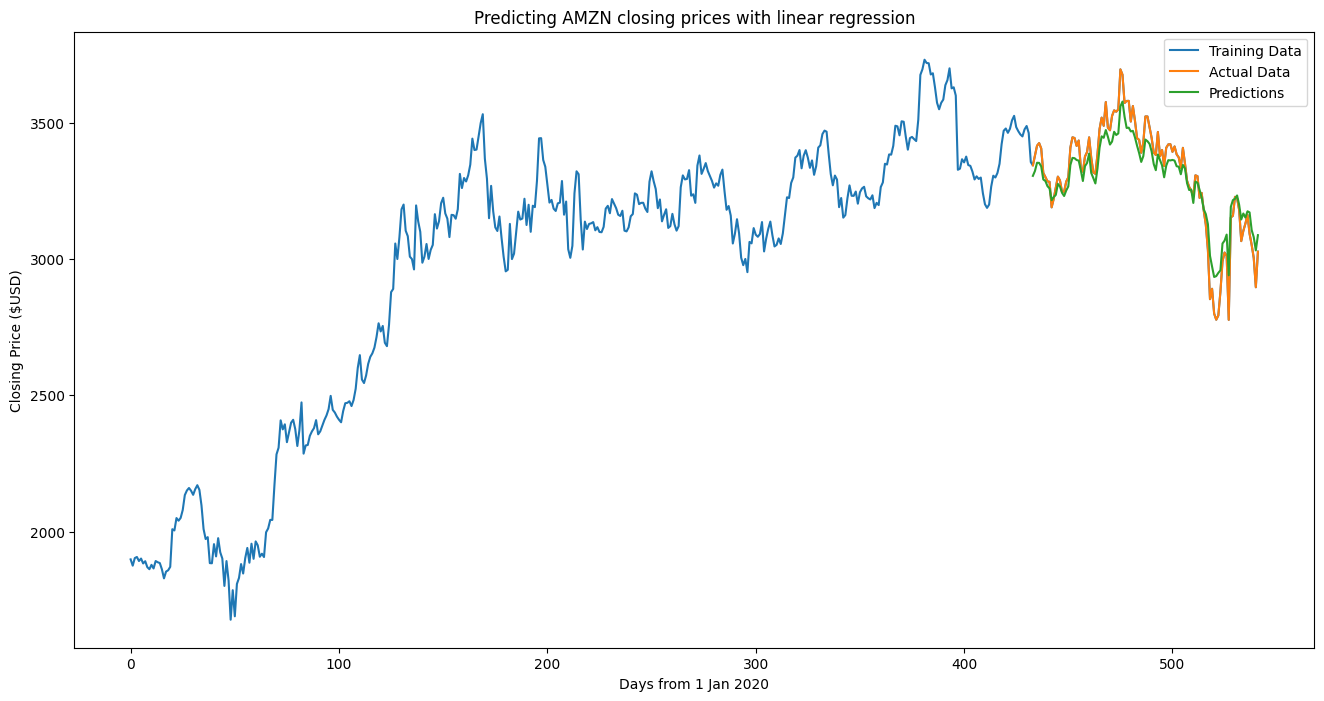

In [105]:
# visualising the predictive ability of the linear regression model on AMZN future closing prices
plt.figure(figsize=[16,8])

plt.plot(amzn_df['close'])

amzn_model_plot = amzn_df[433:].copy()
amzn_model_plot['predict'] = amzn_model.predict(amzn_model_plot.drop(columns = 'target'))
plt.plot(amzn_model_plot[['close', 'predict']])

plt.legend(['Training Data', 'Actual Data', "Predictions"])
plt.xlabel('Days from 1 Jan 2020')
plt.ylabel('Closing Price ($USD)')
plt.title('Predicting AMZN closing prices with linear regression')

The predicters account for 72.9% of the variance in AMZN closing prices 25 days into the future.

## Part 3: META

I then predict the META closing prices 25 days into the future according to current day closing, highest trading, lowest trading and opening prices using linear regression. The procedures are the same as above:
1. Preparing a dataframe with the predictor variables (i.e., `close`,`high`,`low`,`open`) and outcome variable (i.e., closing prices 25 days into the future `target`)
2. Splitting the dataframe into training and testing dataframes
3. Building a linear regression model with the training dataframes
4. Based on the linear regression model, predicting the future closing prices according to predictor variables in the testing dataframe
5. Evaluating the linear regression model performance
6. Visualising the linear regresison model performance

In [106]:
# preparing the META datframe
meta = df.loc[df['symbol'] == "META"]

meta_df = meta[['close','high','low','open']]

meta_df['target'] = meta_df['close'].shift(-25)

meta_df.dropna(axis=0,inplace=True)

/var/folders/_j/0x480n6d6r79_8qfp984ydxm0000gn/T/ipykernel_12935/3314972558.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_df['target'] = meta_df['close'].shift(-25)
/var/folders/_j/0x480n6d6r79_8qfp984ydxm0000gn/T/ipykernel_12935/3314972558.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_df.dropna(axis=0,inplace=True)


In [107]:
# defining the predictor (x) and outcome (y) variables
meta_x = meta_df.drop('target', axis=1).copy()
meta_y = meta_df['target'].copy()

# splitting the META datframe into training and testing datframes
meta_x_train, meta_x_test, meta_y_train, meta_y_test  = train_test_split(meta_x, meta_y, test_size = 0.2)

# inspecting the number of rows and columns of the META training and testing datframes
print("The shape of the training and testing datframes are as follows:\nmeta_x_train: {}\nmeta_x_test: {}\nmeta_y_train: {}\nmeta_y_test: {} \n".format(meta_x_train.shape, meta_x_test.shape, meta_y_train.shape, meta_y_test.shape))

print("There are {} rows and {} columns in the META training datframe.\nThere are {} rows and {} columns in the META testing datframe.".format(meta_y_train.shape[0], meta_x_train.shape[1], meta_y_test.shape[0], meta_x_test.shape[1]))

The shape of the training and testing datframes are as follows:
meta_x_train: (433, 4)
meta_x_test: (109, 4)
meta_y_train: (433,)
meta_y_test: (109,) 

There are 433 rows and 4 columns in the META training datframe.
There are 109 rows and 4 columns in the META testing datframe.


In [108]:
# building the META linear regression model
meta_model = LinearRegression()
meta_model.fit(meta_x_train, meta_y_train)

# predicting META future closing prices based on the model
meta_model_prediction = meta_model.predict(meta_x_test)
print("The actual verses predicted values of META future 25 day closing prices:")
pd.DataFrame({'Actual values':np.array(meta_y_test), 'Predicted values':np.array(meta_model_prediction)})

The actual verses predicted values of META future 25 day closing prices:


,Actual values,Predicted values
0,160.98,229.707689
1,175.19,205.749972
2,261.79,272.073665
3,373.92,350.794707
4,146.96,225.627541
...,...,...
104,375.28,345.376375
105,353.58,343.786918
106,324.63,300.776467
107,284.01,269.849227


In [109]:
# evaluating META linear regression model performance
meta_model_r2 = (abs(meta_model.score(meta_x_test,meta_y_test)*100)).round(2)
print('The r^2 of the META linear regression model is: ', meta_model_r2, '%')

The r^2 of the META linear regression model is:  56.87 %


Text(0.5, 1.0, 'Predicting META closing prices with linear regression')

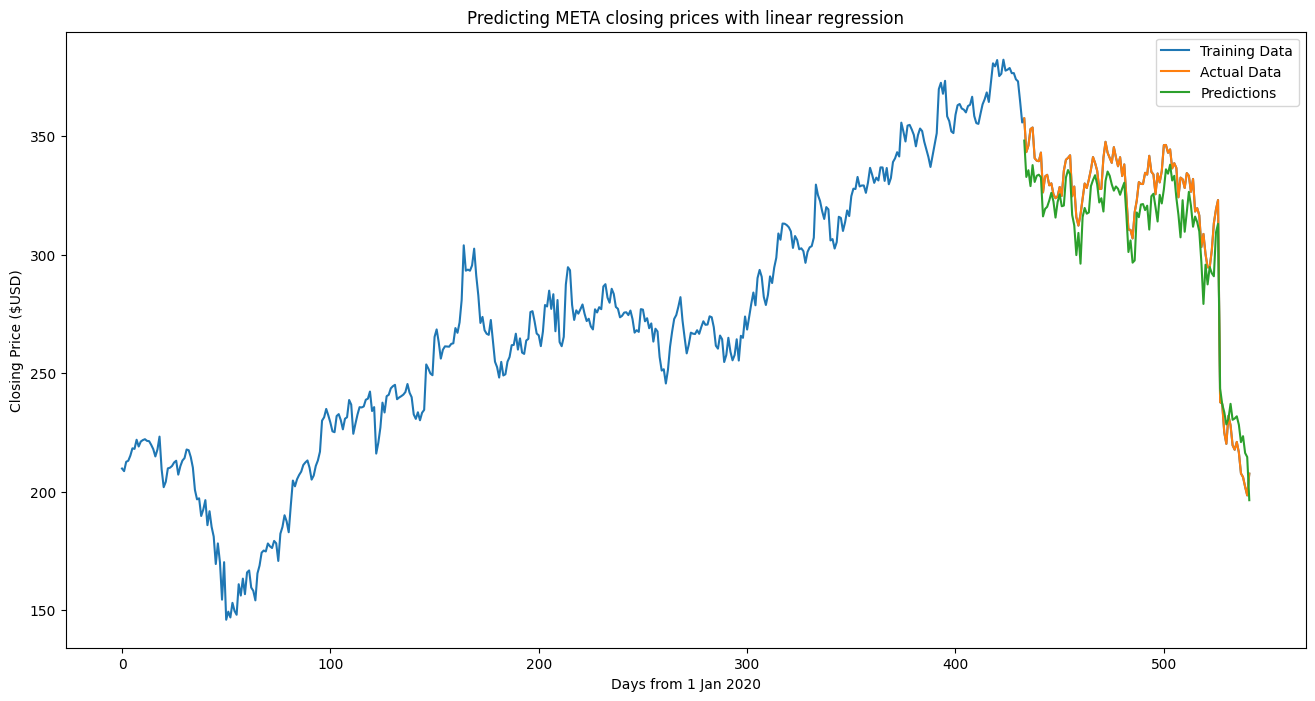

In [110]:
# visualising the predictive ability of the linear regression model on META future closing prices
plt.figure(figsize=[16,8])

plt.plot(meta_df['close'])

meta_model_plot = meta_df[433:].copy()
meta_model_plot['predict'] = meta_model.predict(meta_model_plot.drop(columns = 'target'))
plt.plot(meta_model_plot[['close', 'predict']])

plt.legend(['Training Data', 'Actual Data', "Predictions"])
plt.xlabel('Days from 1 Jan 2020')
plt.ylabel('Closing Price ($USD)')
plt.title('Predicting META closing prices with linear regression')

The predicters account for 64.3% of the variance in META closing prices 25 days into the future.

## Part 4: AAPL

I then predict the AAPL closing prices 25 days into the future according to current day closing, highest trading, lowest trading and opening prices using linear regression. The procedures are the same as above:
1. Preparing a dataframe with the predictor variables (i.e., `close`,`high`,`low`,`open`) and outcome variable (i.e., closing prices 25 days into the future `target`)
2. Splitting the dataframe into training and testing dataframes
3. Building a linear regression model with the training dataframes
4. Based on the linear regression model, predicting the future closing prices according to predictor variables in the testing dataframe
5. Evaluating the linear regression model performance
6. Visualising the linear regresison model performance

In [111]:
# preparing the AAPL datframe
aapl = df.loc[df['symbol'] == "AAPL"]

aapl_df = aapl[['close','high','low','open']]

aapl_df['target'] = aapl_df['close'].shift(-25)

aapl_df.dropna(axis=0,inplace=True)

aapl_df.reset_index(inplace=True)

/var/folders/_j/0x480n6d6r79_8qfp984ydxm0000gn/T/ipykernel_12935/1578268995.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl_df['target'] = aapl_df['close'].shift(-25)
/var/folders/_j/0x480n6d6r79_8qfp984ydxm0000gn/T/ipykernel_12935/1578268995.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl_df.dropna(axis=0,inplace=True)


In [112]:
# defining the predictor (x) and outcome (y) variables
aapl_x = aapl_df.drop('target', axis=1).copy()
aapl_y = aapl_df['target'].copy()

# splitting the AAPL datframe into training and testing datframes
aapl_x_train, aapl_x_test, aapl_y_train, aapl_y_test  = train_test_split(aapl_x, aapl_y, test_size = 0.2)

# inspecting the number of rows and columns of the AAPL training and testing datframes
print("The shape of the training and testing datframes are as follows:\naapl_x_train: {}\naapl_x_test: {}\naapl_y_train: {}\naapl_y_test: {} \n".format(aapl_x_train.shape, aapl_x_test.shape, aapl_y_train.shape, aapl_y_test.shape))

print("There are {} rows and {} columns in the AAPL training datframe.\nThere are {} rows and {} columns in the AAPL testing datframe.".format(aapl_y_train.shape[0], aapl_x_train.shape[1], aapl_y_test.shape[0], aapl_x_test.shape[1]))

The shape of the training and testing datframes are as follows:
aapl_x_train: (433, 5)
aapl_x_test: (109, 5)
aapl_y_train: (433,)
aapl_y_test: (109,) 

There are 433 rows and 5 columns in the AAPL training datframe.
There are 109 rows and 5 columns in the AAPL testing datframe.


In [113]:
# building the AAPL linear regression model
aapl_model = LinearRegression()
aapl_model.fit(aapl_x_train, aapl_y_train)

# predicting future AAPL closing prices based on the model
aapl_model_prediction = aapl_model.predict(aapl_x_test)
print("The actual verses predicted values of AAPL future 25 day closing prices:")
pd.DataFrame({'Actual values':np.array(aapl_y_test), 'Predicted values':np.array(aapl_model_prediction)})

The actual verses predicted values of AAPL future 25 day closing prices:


,Actual values,Predicted values
0,129.41,164.530372
1,147.54,153.691811
2,361.78,281.512207
3,151.83,145.606774
4,133.72,161.705505
...,...,...
104,380.16,304.721117
105,120.59,155.274284
106,137.09,157.120648
107,140.91,145.534676


In [114]:
# evaluating the AAPL linear regression model performance
aapl_model_r2 = (abs(aapl_model.score(aapl_x_test,aapl_y_test)*100)).round(2)
print('The r2 of the AAPL linear regression model is: ', aapl_model_r2, '%')

The r2 of the AAPL linear regression model is:  56.53 %


Text(0.5, 1.0, 'Predicting AAPL closing prices with linear regression')

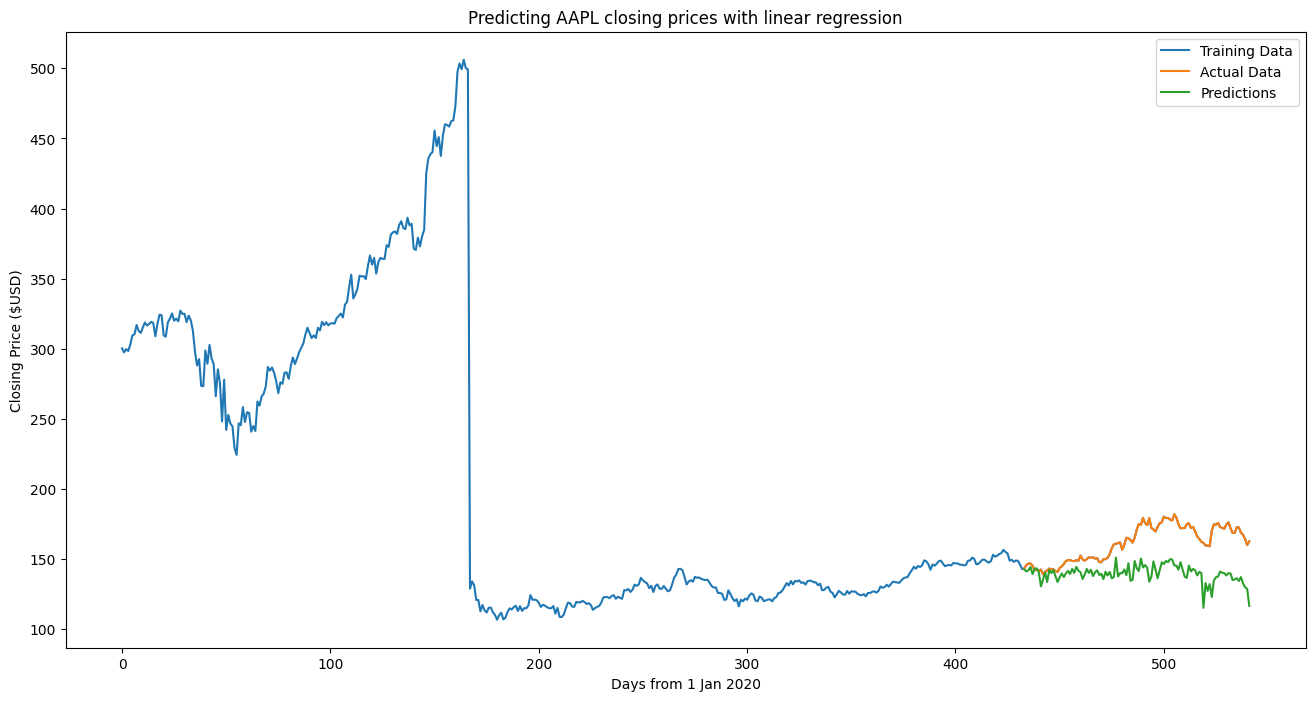

In [115]:
# visualising the predictive ability of the linear regression model on AAPL future closing prices
plt.figure(figsize=[16,8])

plt.plot(aapl_df['close'])

aapl_model_plot = aapl_df[433:].copy()
aapl_model_plot['predict'] = aapl_model.predict(aapl_model_plot.drop(columns = 'target'))
plt.plot(aapl_model_plot[['close', 'predict']])

plt.legend(['Training Data', 'Actual Data', "Predictions"])
plt.xlabel('Days from 1 Jan 2020')
plt.ylabel('Closing Price ($USD)')
plt.title('Predicting AAPL closing prices with linear regression')

The predicters account for 46.3% of the variance in AAPL closing prices 25 days into the future.

## Part 5: Summary of findings

- Linear regression models are used to predict some of the top tech companies' (including Alphabet, Amazonm Meta and Apple) closing prices 25 days into the future according to predictor variables (including current closing, highest trading, lowest trading and opening prices). 
- The predictive abilities of the models are computed based on their R squared, which calculates the amount of variance the predictor variables account for the companies' closing prices 25 days into the future.

In [116]:
print('The R squared of all the 4 models are as follows:')
print('GOOG:', goog_model_r2, '%')
print('AMZN:', amzn_model_r2, '%')
print('META:', meta_model_r2, '%')
print('AAPL:', aapl_model_r2, '%')

The R squared of all the 4 models are as follows:
GOOG: 96.08 %
AMZN: 74.98 %
META: 56.87 %
AAPL: 56.53 %


In conclusion, the linear regression model of GOOG accounts for the most variance in the company's future closing prices; 94.92 % of variance in future closing prices were accounted by the company's current closing, highest trading, lowest trading and opening prices. AAPL has the lowest R squared (r^2 = 46.3 %), suggesting that the predictor variables did not significantly predict the Apple's future closing prices.